In [6]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx

from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [7]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

In [9]:
#loading dataset
df=pd.read_csv('newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [10]:
df.shape

(1470, 35)

In [11]:
df.shape

(1470, 35)

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [14]:
df = df.drop(['Over18', 'EmployeeCount',	'EmployeeNumber', 'StandardHours'], axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [15]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [16]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

In [17]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [18]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [19]:
numerical = df.select_dtypes(include=['float64','int64'])

In [20]:
numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


In [21]:
continious = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]

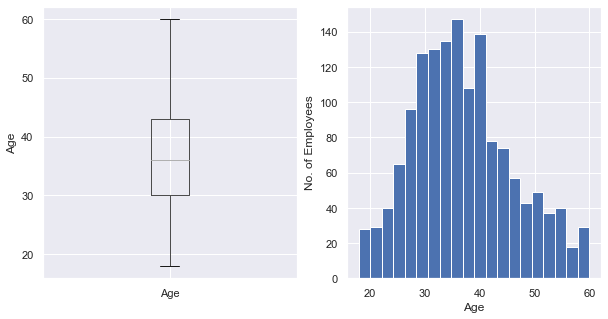

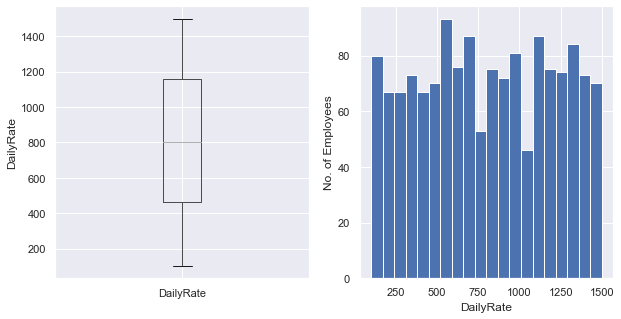

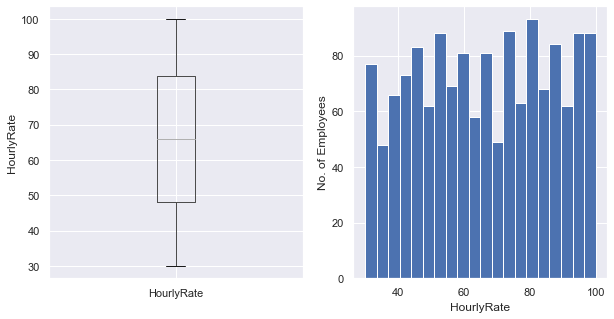

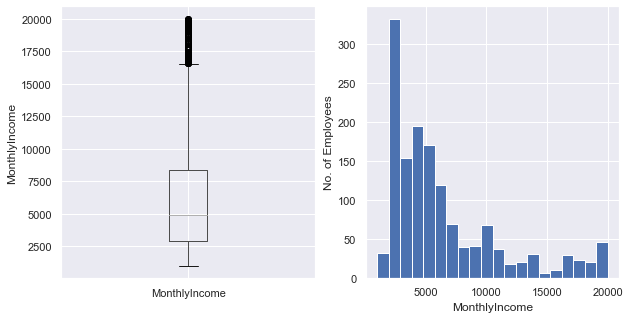

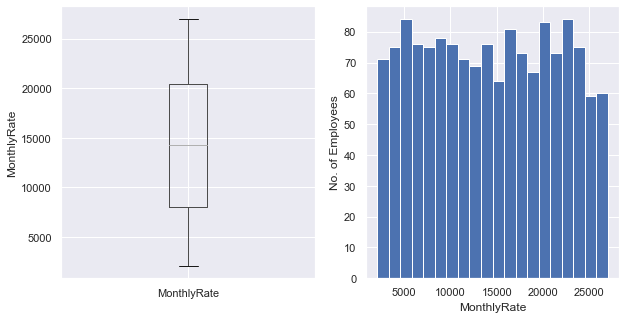

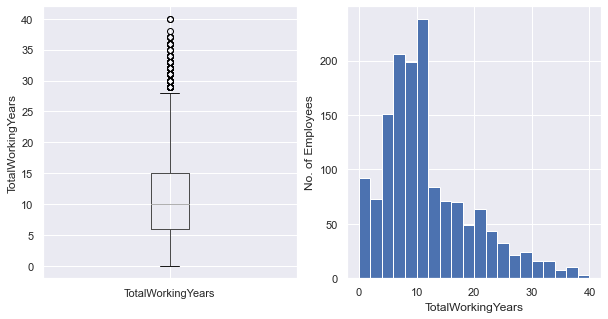

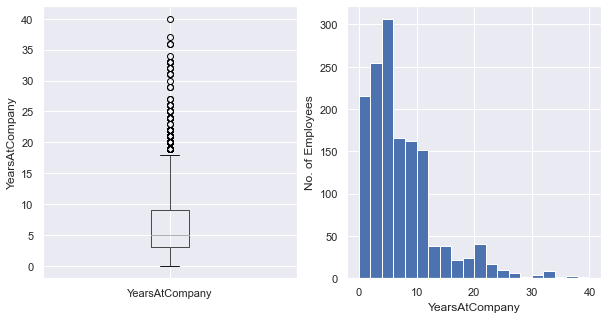

In [22]:
for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = numerical.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = numerical[var].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(var)
    
    plt.show()
    

In [23]:
"""numerical.loc[numerical['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000
numerical.loc[numerical['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28
numerical.loc[numerical['YearsAtCompany']>18, 'YearsAtCompany'] = 18
numerical.head()"""

"numerical.loc[numerical['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000\nnumerical.loc[numerical['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28\nnumerical.loc[numerical['YearsAtCompany']>18, 'YearsAtCompany'] = 18\nnumerical.head()"

In [24]:
df.loc[df['MonthlyIncome']>16000, 'MonthlyIncome'] = 16000
df.loc[df['TotalWorkingYears']>28, 'TotalWorkingYears'] = 28
df.loc[df['YearsAtCompany']>18, 'YearsAtCompany'] = 18
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [25]:
categorical = df.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [26]:
df_cat = pd.get_dummies(categorical)
df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [27]:
df = df.drop([
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 
 'OverTime'], axis = 1)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0


In [28]:
df1 = pd.concat([df,df_cat], axis=1)
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [29]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRol

In [30]:
"""df1 = df1.drop(['BusinessTravel_Non-Travel', 'Department_Human Resources', 'EducationField_Other',
                'EducationField_Human Resources', 'JobRole_Human Resources', 'JobRole_Healthcare Representative', 'JobRole_Research Director', 'JobRole_Sales Representative',
                'JobRole_Manager', 'MaritalStatus_Divorced'], axis = 1)
df1.head()"""

"df1 = df1.drop(['BusinessTravel_Non-Travel', 'Department_Human Resources', 'EducationField_Other',\n                'EducationField_Human Resources', 'JobRole_Human Resources', 'JobRole_Healthcare Representative', 'JobRole_Research Director', 'JobRole_Sales Representative',\n                'JobRole_Manager', 'MaritalStatus_Divorced'], axis = 1)\ndf1.head()"

In [31]:
scale_data=[feature for feature in df1.columns if feature not in ['Attrition']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
df1[scale_data]=scaler.fit_transform(df1[scale_data])
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
u3 = df1.drop(['Attrition'], axis = 1)
u3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.332466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.274898,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.072110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.126743,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.164032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [33]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'hamming')
s

array([[0.        , 0.66666667, 0.52941176, ..., 0.50980392, 0.56862745,
        0.58823529],
       [0.66666667, 0.        , 0.58823529, ..., 0.45098039, 0.45098039,
        0.49019608],
       [0.52941176, 0.58823529, 0.        , ..., 0.50980392, 0.54901961,
        0.49019608],
       ...,
       [0.50980392, 0.45098039, 0.50980392, ..., 0.        , 0.56862745,
        0.47058824],
       [0.56862745, 0.45098039, 0.54901961, ..., 0.56862745, 0.        ,
        0.45098039],
       [0.58823529, 0.49019608, 0.49019608, ..., 0.47058824, 0.45098039,
        0.        ]])

In [34]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,0.666667,0.529412,0.509804,0.647059,0.529412,0.568627,0.607843,0.627451,0.607843,...,0.509804,0.549020,0.470588,0.568627,0.509804,0.627451,0.647059,0.509804,0.568627,0.588235
1,0.666667,0.000000,0.588235,0.450980,0.450980,0.509804,0.588235,0.470588,0.411765,0.470588,...,0.549020,0.607843,0.588235,0.509804,0.627451,0.431373,0.431373,0.450980,0.450980,0.490196
2,0.529412,0.588235,0.000000,0.490196,0.470588,0.450980,0.470588,0.411765,0.490196,0.509804,...,0.450980,0.470588,0.647059,0.529412,0.431373,0.509804,0.509804,0.509804,0.549020,0.490196
3,0.509804,0.450980,0.490196,0.000000,0.549020,0.431373,0.490196,0.509804,0.509804,0.549020,...,0.470588,0.588235,0.607843,0.607843,0.549020,0.529412,0.568627,0.529412,0.568627,0.568627
4,0.647059,0.450980,0.470588,0.549020,0.000000,0.490196,0.490196,0.431373,0.588235,0.431373,...,0.509804,0.529412,0.549020,0.509804,0.549020,0.392157,0.411765,0.450980,0.470588,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.627451,0.431373,0.509804,0.529412,0.392157,0.450980,0.470588,0.509804,0.529412,0.411765,...,0.529412,0.568627,0.588235,0.509804,0.607843,0.000000,0.450980,0.470588,0.431373,0.411765
1466,0.647059,0.431373,0.509804,0.568627,0.411765,0.529412,0.509804,0.490196,0.490196,0.372549,...,0.490196,0.490196,0.490196,0.470588,0.568627,0.450980,0.000000,0.529412,0.509804,0.431373
1467,0.509804,0.450980,0.509804,0.529412,0.450980,0.607843,0.470588,0.450980,0.490196,0.509804,...,0.588235,0.509804,0.607843,0.509804,0.607843,0.470588,0.529412,0.000000,0.568627,0.470588
1468,0.568627,0.450980,0.549020,0.568627,0.470588,0.509804,0.568627,0.607843,0.490196,0.450980,...,0.509804,0.509804,0.509804,0.509804,0.509804,0.431373,0.509804,0.568627,0.000000,0.450980


In [35]:
# taking average of the hamming distance matrix
y = np.average(X1)
y

0.5171816935390936

In [36]:
adjmat_df=X1.copy()

In [37]:
# setting threshold value as mean of hamming matrix
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [38]:
# adjacency matrix
adjmat_df

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1468,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
G = nx.from_numpy_matrix(np.array(adjmat_df))
G

In [40]:
A=nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 1., 1.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
H=nx.from_numpy_matrix(A)
H

In [45]:
!python --version

Python 3.7.16


In [42]:
!pip install stellargraph

In [44]:
import stellargraph
from stellargraph import StellarGraph

ModuleNotFoundError: No module named 'stellargraph'

In [311]:
square_feature_dataframe = StellarGraph.from_networkx(H, node_features=adjmat_df)
print(square_feature_dataframe.info())

StellarGraph: Undirected multigraph
 Nodes: 1470, Edges: 541676

 Node types:
  default: [1470]
    Features: float32 vector, length 1470
    Edge types: default-default->default

 Edge types:
    default-default->default: [541676]
        Weights: all 1 (default)
        Features: none


In [312]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

In [313]:
fullbatch_generator = FullBatchNodeGenerator(square_feature_dataframe, sparse=False)
fullbatch_generator 

Using GCN (local pooling) filters...


In [314]:
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)
gcn_model

In [315]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)
emb_model

In [316]:
all_nodes = df1['Attrition'].index
all_gen = fullbatch_generator.flow(all_nodes)

In [317]:
emb = emb_model.predict(all_gen)
emb.shape

1/1 [==============================] - 0s 379ms/step


(1470, 128)

In [318]:
node_emb = pd.DataFrame(emb)
node_emb

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.657721,0.0,0.0,0.624001,0.427811,0.0,0.0,0.411907,0.000000,0.0,...,0.392156,0.0,0.000000,1.210823,0.000000,0.760209,0.000000,0.0,0.993515,0.0
1,0.689432,0.0,0.0,0.139340,0.696114,0.0,0.0,0.335198,0.000000,0.0,...,0.489423,0.0,0.000000,0.963847,0.316189,0.733384,0.000000,0.0,0.564012,0.0
2,0.666017,0.0,0.0,0.241020,0.495817,0.0,0.0,0.271682,0.133773,0.0,...,0.522738,0.0,0.269596,0.958866,0.244652,0.686201,0.000000,0.0,0.776024,0.0
3,0.614406,0.0,0.0,0.330084,0.425344,0.0,0.0,0.100694,0.000000,0.0,...,0.271700,0.0,0.077708,0.897180,0.216198,0.590847,0.000000,0.0,0.740689,0.0
4,0.414005,0.0,0.0,0.039240,0.590638,0.0,0.0,0.327761,0.069951,0.0,...,0.524449,0.0,0.130953,0.686011,0.335521,0.647615,0.044139,0.0,0.540148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.507461,0.0,0.0,0.111796,0.636716,0.0,0.0,0.412704,0.000000,0.0,...,0.545831,0.0,0.143731,0.911913,0.393294,0.697577,0.000000,0.0,0.583871,0.0
1466,0.484238,0.0,0.0,0.086061,0.693742,0.0,0.0,0.356651,0.000000,0.0,...,0.636689,0.0,0.000000,0.902824,0.335838,0.777008,0.000000,0.0,0.525069,0.0
1467,0.657024,0.0,0.0,0.148342,0.688109,0.0,0.0,0.312853,0.014086,0.0,...,0.501852,0.0,0.000000,0.981750,0.333195,0.814888,0.000000,0.0,0.691042,0.0
1468,0.591200,0.0,0.0,0.396400,0.536604,0.0,0.0,0.508732,0.000000,0.0,...,0.498839,0.0,0.000000,1.195257,0.147403,0.744885,0.000000,0.0,0.822328,0.0


In [319]:
node_Class = df1['Attrition']

In [320]:
node_emb['Class']=node_Class
node_emb

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Class
0,0.657721,0.0,0.0,0.624001,0.427811,0.0,0.0,0.411907,0.000000,0.0,...,0.0,0.000000,1.210823,0.000000,0.760209,0.000000,0.0,0.993515,0.0,1
1,0.689432,0.0,0.0,0.139340,0.696114,0.0,0.0,0.335198,0.000000,0.0,...,0.0,0.000000,0.963847,0.316189,0.733384,0.000000,0.0,0.564012,0.0,0
2,0.666017,0.0,0.0,0.241020,0.495817,0.0,0.0,0.271682,0.133773,0.0,...,0.0,0.269596,0.958866,0.244652,0.686201,0.000000,0.0,0.776024,0.0,1
3,0.614406,0.0,0.0,0.330084,0.425344,0.0,0.0,0.100694,0.000000,0.0,...,0.0,0.077708,0.897180,0.216198,0.590847,0.000000,0.0,0.740689,0.0,0
4,0.414005,0.0,0.0,0.039240,0.590638,0.0,0.0,0.327761,0.069951,0.0,...,0.0,0.130953,0.686011,0.335521,0.647615,0.044139,0.0,0.540148,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.507461,0.0,0.0,0.111796,0.636716,0.0,0.0,0.412704,0.000000,0.0,...,0.0,0.143731,0.911913,0.393294,0.697577,0.000000,0.0,0.583871,0.0,0
1466,0.484238,0.0,0.0,0.086061,0.693742,0.0,0.0,0.356651,0.000000,0.0,...,0.0,0.000000,0.902824,0.335838,0.777008,0.000000,0.0,0.525069,0.0,0
1467,0.657024,0.0,0.0,0.148342,0.688109,0.0,0.0,0.312853,0.014086,0.0,...,0.0,0.000000,0.981750,0.333195,0.814888,0.000000,0.0,0.691042,0.0,0
1468,0.591200,0.0,0.0,0.396400,0.536604,0.0,0.0,0.508732,0.000000,0.0,...,0.0,0.000000,1.195257,0.147403,0.744885,0.000000,0.0,0.822328,0.0,0


In [321]:
X=node_emb.drop(['Class'],axis=1)
Y=node_emb['Class']

In [322]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [323]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [324]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lr.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.854421768707483
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1233
           1       0.83      0.12      0.21       237

    accuracy                           0.85      1470
   macro avg       0.84      0.56      0.57      1470
weighted avg       0.85      0.85      0.81      1470

Confusion matrix:  [[1227    6]
 [ 208   29]]


In [325]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
rf = RandomForestClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rf.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(rf.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8517006802721089
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1233
           1       0.66      0.16      0.26       237

    accuracy                           0.85      1470
   macro avg       0.76      0.57      0.59      1470
weighted avg       0.83      0.85      0.81      1470

Confusion matrix:  [[1213   20]
 [ 198   39]]


In [326]:
gbc = GradientBoostingClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    gbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(gbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8367346938775511
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1233
           1       0.49      0.23      0.31       237

    accuracy                           0.84      1470
   macro avg       0.68      0.59      0.61      1470
weighted avg       0.80      0.84      0.81      1470

Confusion matrix:  [[1175   58]
 [ 182   55]]


In [327]:
abc = AdaBoostClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    abc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(abc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.826530612244898
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1233
           1       0.44      0.27      0.33       237

    accuracy                           0.83      1470
   macro avg       0.65      0.60      0.62      1470
weighted avg       0.80      0.83      0.81      1470

Confusion matrix:  [[1152   81]
 [ 174   63]]


In [328]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(xgbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8380952380952381
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1233
           1       0.50      0.21      0.30       237

    accuracy                           0.84      1470
   macro avg       0.68      0.58      0.60      1470
weighted avg       0.80      0.84      0.81      1470

Confusion matrix:  [[1182   51]
 [ 187   50]]


In [329]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lgb.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lgb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.845578231292517
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1233
           1       0.55      0.23      0.33       237

    accuracy                           0.85      1470
   macro avg       0.71      0.60      0.62      1470
weighted avg       0.82      0.85      0.82      1470

Confusion matrix:  [[1188   45]
 [ 182   55]]


In [330]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC(random_state=7, tol=3e-5)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lsvm.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lsvm.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Accuracy:  0.861904761904762
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.83      0.18      0.30       237

    accuracy                           0.86      1470
   macro avg       0.85      0.59      0.61      1470
weighted avg       0.86      0.86      0.82      1470

Confusion matrix:  [[1224    9]
 [ 194   43]]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [331]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [332]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[ 91 156]
 [  6  41]]
              precision    recall  f1-score   support

           0       0.94      0.37      0.53       247
           1       0.21      0.87      0.34        47

    accuracy                           0.45       294
   macro avg       0.57      0.62      0.43       294
weighted avg       0.82      0.45      0.50       294

accuracy_score:  0.4489795918367347


In [333]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC(random_state=7, tol=3e-5)
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[245   2]
 [ 36  11]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.85      0.23      0.37        47

    accuracy                           0.87       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.87      0.87      0.84       294

accuracy_score:  0.8707482993197279


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [342]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[245   2]
 [ 39   8]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.80      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.83      0.58      0.60       294
weighted avg       0.85      0.86      0.82       294

accuracy_score:  0.8605442176870748


In [341]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[233  14]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       247
           1       0.48      0.28      0.35        47

    accuracy                           0.84       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.81      0.84      0.82       294

accuracy_score:  0.8367346938775511


In [336]:
log = LogisticRegression(max_iter=10000) 
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[246   1]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.90      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.88      0.59      0.62       294
weighted avg       0.87      0.87      0.83       294

accuracy_score:  0.8673469387755102


In [337]:
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(x_train, y_train)
y_pred=gbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[238   9]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.72      0.61      0.63       294
weighted avg       0.82      0.85      0.83       294

accuracy_score:  0.8503401360544217


In [338]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(x_train, y_train)
y_pred=lgb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[239   8]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.60      0.26      0.36        47

    accuracy                           0.85       294
   macro avg       0.74      0.61      0.64       294
weighted avg       0.83      0.85      0.83       294

accuracy_score:  0.8537414965986394
